In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [2]:
class Batsmanstate(TypedDict):
    runs: int
    balls: int
    fours: int
    six: int  

    sr :float
    bnp: float
    boundary_percent: float
    summary:str

In [3]:
def calculate_sr(state:Batsmanstate):
    sr = state['runs']/state['balls']/100
    return {'sr':sr}

In [12]:
def calcualte_bpd(state:Batsmanstate):
    bnp = (state['balls']/state['fours']+state['balls']/state['six'])
    return {'bnp':bnp}

In [13]:
def calcualte_boundary_perecent(state:Batsmanstate):
    boundary_percent = (((state['fours']* 4) + (state['six']*6))/state['runs'])
    return {'boundary_percent':boundary_percent}

In [14]:
def summary(state:Batsmanstate):
    summary = f"""
Strike Rate - {state['sr']}/n 
Balls per boundary - {state['bnp']}/n
Boundary_percent -{state['boundary_percent']}
"""

    return { 'summary':summary}

In [15]:
graph = StateGraph(Batsmanstate)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calcualte_bpd',calcualte_bpd)
graph.add_node('calcualte_boundary_perecent',calcualte_boundary_perecent)
graph.add_node('summary',summary)

In [16]:
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calcualte_bpd')
graph.add_edge(START,'calcualte_boundary_perecent')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calcualte_bpd','summary')
graph.add_edge('calcualte_boundary_perecent','summary')
graph.add_edge('summary',END)

In [17]:
workflow = graph.compile()

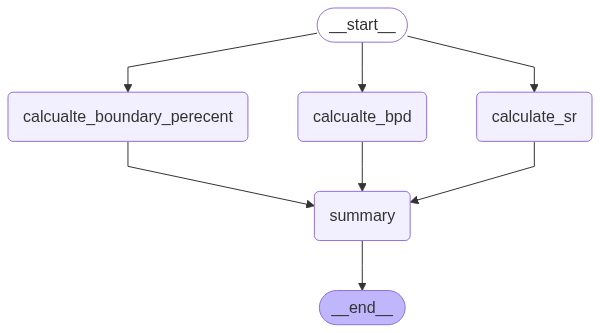

In [18]:
workflow

In [19]:
inital_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'six':4
}
workflow.invoke(inital_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'six': 4,
 'sr': 0.02,
 'bnp': 20.833333333333336,
 'boundary_percent': 0.48,
 'summary': '\nStrike Rate - 0.02/n \nBalls per boundary - 20.833333333333336/n\nBoundary_percent -0.48\n'}